##:  Data analysis and classification done on the USA university admission data

In [26]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [27]:
#importing the dataset
data=pd.read_csv("binary.csv")

In [28]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [29]:
#using groupby to group the data by rank 
x=data.groupby("rank")

In [30]:
#Getting rank wise data
rank1=x.get_group(1)
rank2=x.get_group(2)
rank3=x.get_group(3)
rank4=x.get_group(4)

#### we can se below high number changes of selection when Rank is 1

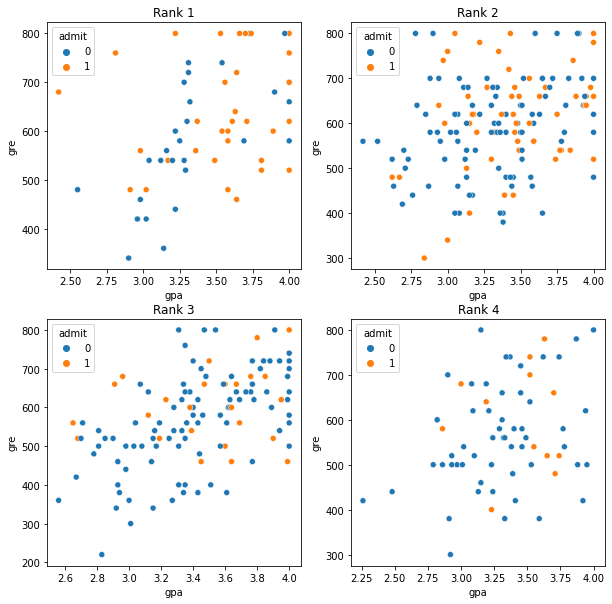

In [31]:
#visualizing the data rank wise
fig,ax=plt.subplots(2,2,figsize=(10,10))
snb.scatterplot(y="gre",x="gpa",hue="admit",ax=ax[0,0],data=rank1)
ax[0,0].set_title("Rank 1")
snb.scatterplot(y="gre",x="gpa",hue="admit",ax=ax[0,1],data=rank2)
ax[0,1].set_title("Rank 2")
snb.scatterplot(y="gre",x="gpa",hue="admit",ax=ax[1,0],data=rank3)
ax[1,0].set_title("Rank 3")
snb.scatterplot(y="gre",x="gpa",hue="admit",ax=ax[1,1],data=rank4)
ax[1,1].set_title("Rank 4")
plt.show(fig)

In [32]:
#Data describe
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [33]:
#datatypes and null values in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


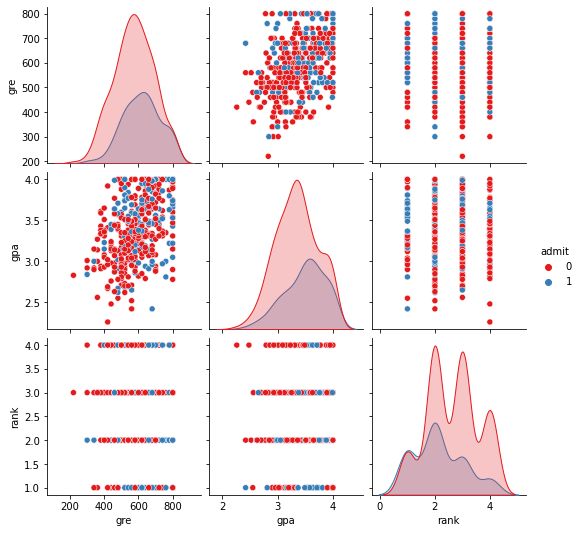

In [34]:
# Relationsheep between each feature with among them using scatter plot, hue=admit
snb.pairplot(data,kind="scatter",hue="admit",palette="Set1")
plt.show()

In [35]:
corrmat=data.corr()
print(corrmat)

          admit       gre       gpa      rank
admit  1.000000  0.184434  0.178212 -0.242513
gre    0.184434  1.000000  0.384266 -0.123447
gpa    0.178212  0.384266  1.000000 -0.057461
rank  -0.242513 -0.123447 -0.057461  1.000000


In [36]:
# cumulative GRE and GPA has highest correlation
corrmat.sort_values(by = 'admit', ascending=False).admit

admit    1.000000
gre      0.184434
gpa      0.178212
rank    -0.242513
Name: admit, dtype: float64

##Heatmap to visualize corelation between features


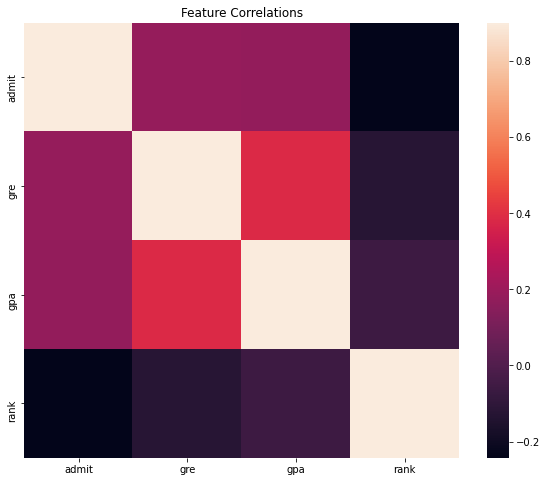

In [37]:
fig, ax = plt.subplots(figsize = (10,8))
snb.heatmap(corrmat, vmax=.9, square=True,ax=ax)
ax.set_title('Feature Correlations')
plt.show(fig)

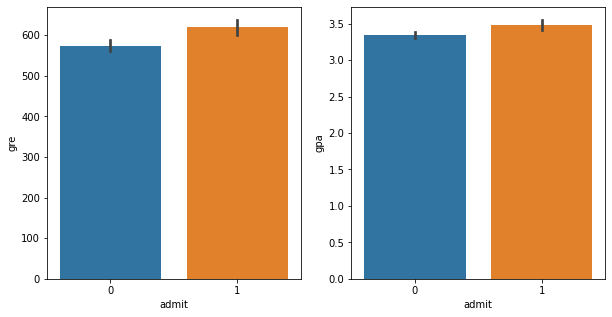

In [38]:
#Bar plot to visualize admission result based on gre and gpa but no pattern found
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
snb.barplot(ax=ax1,data=data,x='admit',y='gre')
snb.barplot(ax=ax2,data=data,x='admit',y='gpa')
plt.show(fig)

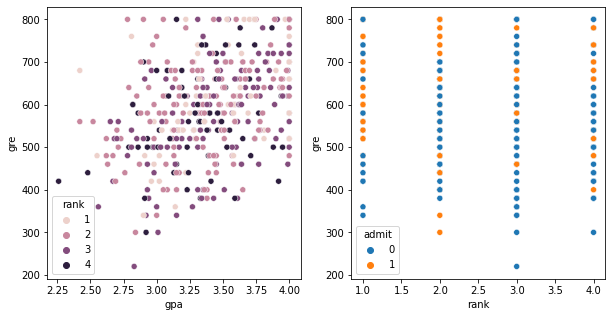

In [39]:
# Scatter plot to visualize the gpa and gre based on rank
# No such strong pattern or correlation found between rank and gre, gpa
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
snb.scatterplot(x='gpa',y='gre',hue="rank",data=data,ax=ax1)
snb.scatterplot(x='rank',y='gre',hue="admit",data=data,ax=ax2)
plt.show(fig)

##Below we are searching for some pattern or condition how a student is selecting. But there is not strong condition which is true


1.   I have use multiple condition but it is not satifying completely
2.   I have used gre threshold as 700 and gpa as 3 



In [40]:
#Cross tab to see the admission data based on rank 
#there are around 50%+ change of getting selected if rank is 
pd.crosstab([data["rank"],data["gre"]>700,data["gpa"]>3],data["admit"])

admit              0   1
rank gre   gpa          
1    False False   4   3
           True   19  21
     True  False   0   1
           True    5   8
2    False False  18   6
           True   73  38
     True  False   2   2
           True    4   8
3    False False  17   4
           True   64  19
     True  True   12   5
4    False False  12   2
           True   35   8
     True  True    8   2

## Creating a Regression model to predict the admission 

In [41]:
# Separating dependant and independant features 
y=data.iloc[:,0].values
x=data.iloc[:,1:].values

In [42]:
# Splitting the dataset into training and test 
# Using standard scaler to setandarlization the features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [43]:
# Using SVM model from sklearn library
from sklearn.svm import SVC
s=SVC(kernel='linear',random_state=0)
s.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
# Using Logistic Regression from sklearn library
from sklearn.linear_model import LogisticRegression 
log=LogisticRegression(random_state=1)
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Using naive bayes from sklearn
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
# Printing the accuracy socre of all three models Logistic Regression and Naive bays has similar results
from sklearn.metrics import accuracy_score
y_pred_svm=s.predict(x_test)
y_pred_log=log.predict(x_test)
y_pred_clf=clf.predict(x_test)
print("SVM:",accuracy_score(y_pred_svm,y_test))
print("Logistic Regression:",accuracy_score(y_pred_log,y_test))
print("GUssian NB:",accuracy_score(y_pred_clf,y_test))


SVM: 0.6375
Logistic Regression: 0.7
GUssian NB: 0.7
